In [1]:
from gerrychain import (GeographicPartition, Partition, Graph, proposals, updaters, constraints, accept, Election, grid)
from gerrychain.metrics import mean_median, partisan_bias, polsby_popper, efficiency_gap, partisan_gini
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle
import json
import time
from functools import partial
from chain import MarkovChain as mc2
from plotting import *
import networkx as nx

In [2]:
run run_chains4

In [3]:
graph = Graph.from_json('graph_combined_vs_2018.json')

In [4]:
my_updaters = {"population": updaters.Tally('POP100', alias="population"),
                       "polsby_popper": polsby_popper,
                       "split_counties": SplitCounties(),
                       'SEN10': Election('SEN10', {"Dem": "SEN_DEM", "Rep": "SEN_REP"}),
                       'G10': Election('G10', {"Dem": "G_DEM", "Rep": "G_REP"}),
                       'COMB10': Election('COMB10', {"Dem":"COMB_DEM", "Rep":"COMB_REP"}),
                       'assignment_array': AssignmentArray()}

In [5]:
initial_partition = GeographicPartition(graph, 'US_Distric', my_updaters)

In [6]:
a = initial_partition.assignment

In [7]:
a2 = dict()
for key in a.keys():
    if a[key] in [0, 1, 2]:
        a2[key] = 0
    else:
        a2[key] = 1

In [8]:
ideal = np.mean(list(initial_partition['population'].values()))

In [12]:
custom = lambda p: 0.5*len(p['cut_edges']) + 200*(1 - p['population'][1]/ideal)**2
c = Chain('flip-mh', 1000, starting_assignment=a2, storage_ratio=100, weights={'custom':1}, custom=custom)

In [22]:
c.stored_assignments.loc[0, :]

0       0
1       0
2       0
3       0
4       0
       ..
2635    0
2636    0
2637    0
2638    0
2639    0
Name: 0, Length: 2640, dtype: uint8

ValueError: zero-size array to reduction operation minimum which has no identity

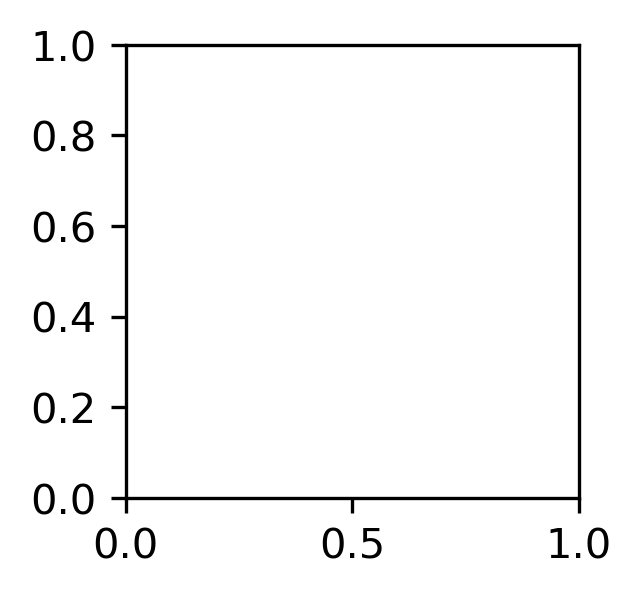

In [23]:
plot_district_map(c.stored_assignments.loc[0, :])

In [ ]:
c.chain.attempted

In [ ]:
c.data['POP2'].describe()

In [ ]:
c.data

In [18]:
c.chain.attempted

1001

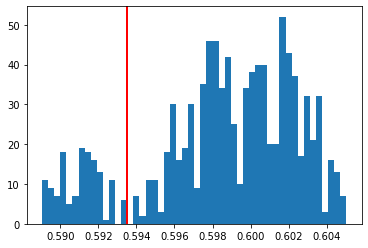

In [13]:
key = 'Sorted SenRep Vote Share 1'
plt.hist(c.data[key], bins=50)
plt.gca().axvline(x=c.data[key][0], color='r', lw=2)